In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #Necesario para la estandarizacion de los datos

In [5]:
vinos = datasets.load_wine()
variables = np.array(vinos.feature_names)
x_vinos = vinos.data
y_vinos = vinos.target

In [7]:
scaler = StandardScaler() #Esto sirve para estandarizar y que mas adelante se obtenga una mejor presicion
scaler.fit(vinos.data)
x_scaled = scaler.transform(vinos.data)
x = pd.DataFrame(x_scaled, columns=variables, ) #Si deseas trabajar con los datos sin estandarizar, solo cambia x_scaled por x_vinos
y = pd.DataFrame(y_vinos, columns= ["Target"])
x.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Cantidad de Centroides: 1 ---  Precision: 0.0
Cantidad de Centroides: 2 ---  Precision: 0.3887
Cantidad de Centroides: 3 ---  Precision: 0.9149
Cantidad de Centroides: 4 ---  Precision: 0.7492
Cantidad de Centroides: 5 ---  Precision: 0.6372
Cantidad de Centroides: 6 ---  Precision: 0.6842
Cantidad de Centroides: 7 ---  Precision: 0.554
Cantidad de Centroides: 8 ---  Precision: 0.3955
Cantidad de Centroides: 9 ---  Precision: 0.427
Cantidad de Centroides: 10 ---  Precision: 0.3752


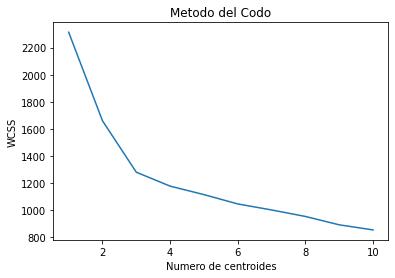

Se recomienda emplear una cantidad de 3 centroides, para asi garantizar una precision de 0.9149


In [9]:
wcss =[]
n = 1
acc = 0
for i in range(1, 11):
    codo = KMeans(n_clusters = i, max_iter = 1000, random_state = 0)
    codo.fit(x)
    y_kmeans = codo.predict(x)
    wcss.append(codo.inertia_)
    accuracy =  round(metrics.adjusted_rand_score(y_vinos, y_kmeans), 4)
    print(f'Cantidad de Centroides: {i} ---  Precision: {accuracy}')
    if accuracy > acc:
        acc = accuracy
        n = i
plt.plot(range(1, 11), wcss)
plt.title('Metodo del Codo')
plt.xlabel('Numero de centroides')
plt.ylabel('WCSS')
plt.show()
print(f"Se recomienda emplear una cantidad de {n} centroides, para asi garantizar una precision de {acc}")

In [11]:
modelo = KMeans(n_clusters = n, max_iter = 1000) #El numero de cluster dependerá del código anterior
modelo.fit(x)
y_labels = modelo.labels_
y_kmeans = modelo.predict(x)
print('predicciones ', y_kmeans)
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])

predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
accuracy =  metrics.adjusted_rand_score(y_vinos, y_kmeans)
print(round(accuracy, 5))

0.89749


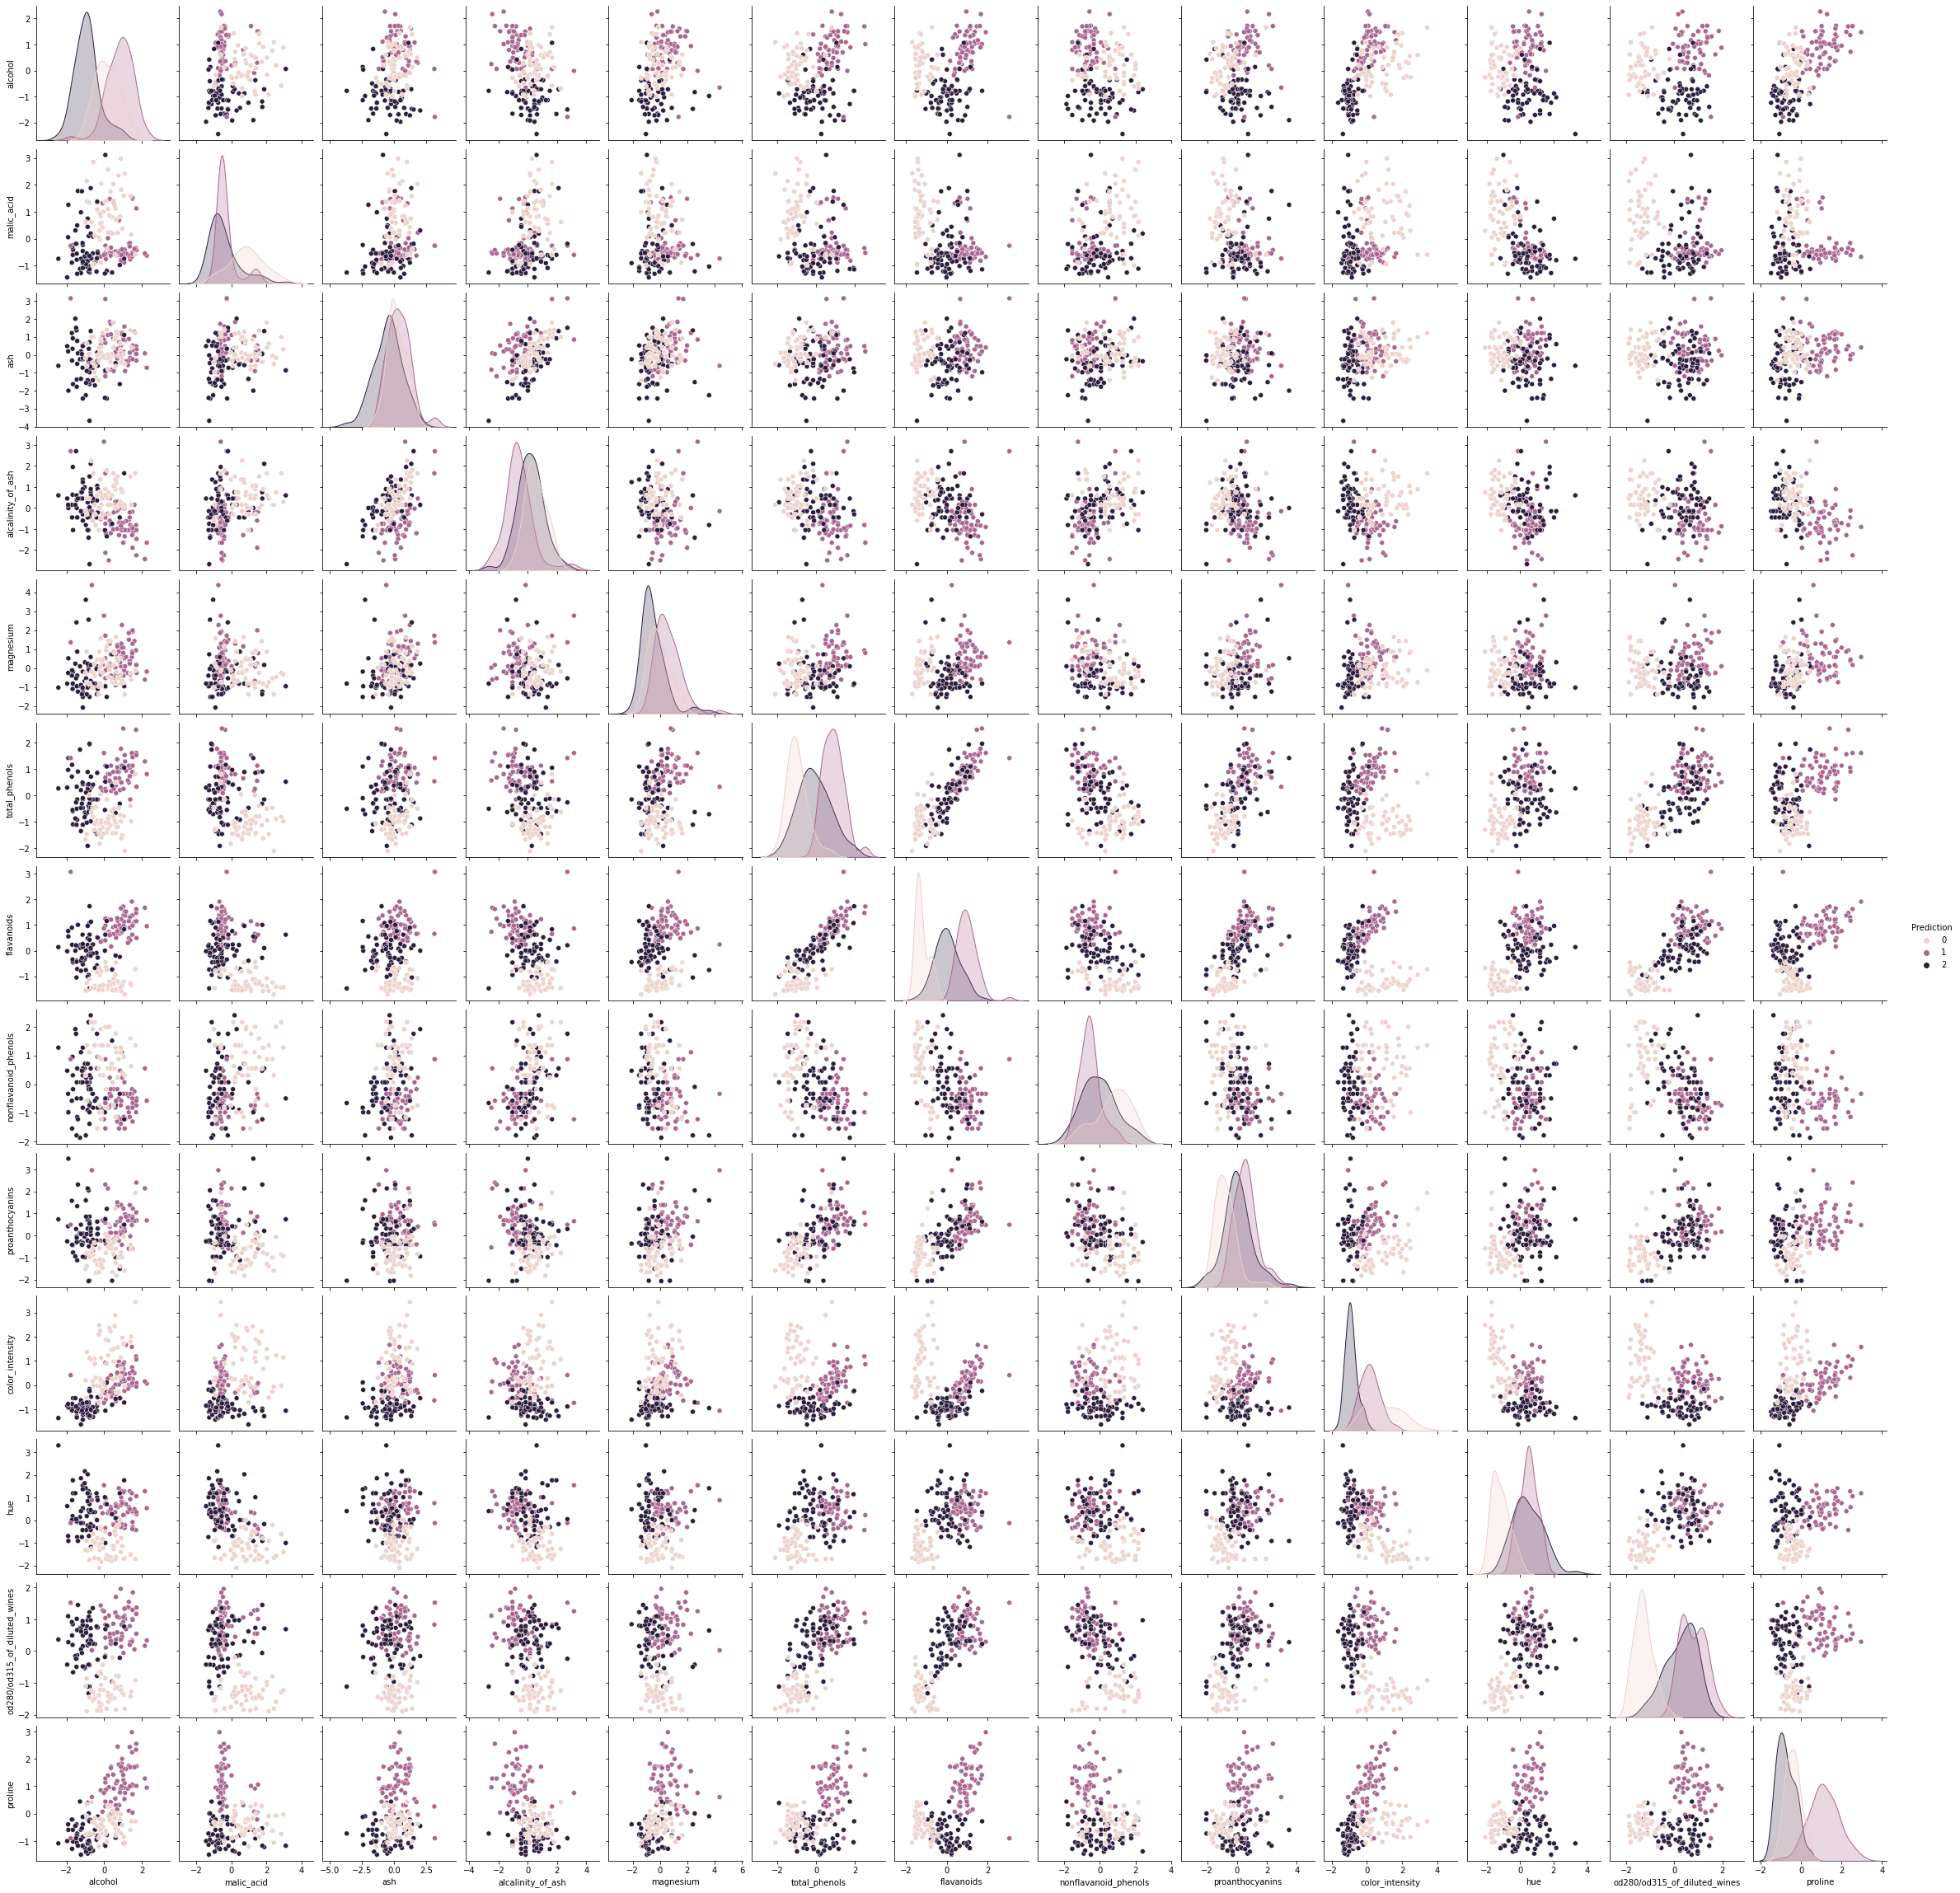

In [13]:
# Concateno el dataset de entrada con el de la prediccion
Z = pd.concat([x, y_kmeans_df], axis = 1)
# Grafico
sns.pairplot(Z, hue = 'Prediction')